<a href="https://colab.research.google.com/github/DanieelRC/RNyAP/blob/main/RodriguezCarreonDaniel_Regla_de_Aprendizaje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Rodriguez Carreón Daniel             17 de septiembre de 2025

In [56]:
import nni.functions as nf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap

colors = ['red', 'blue']

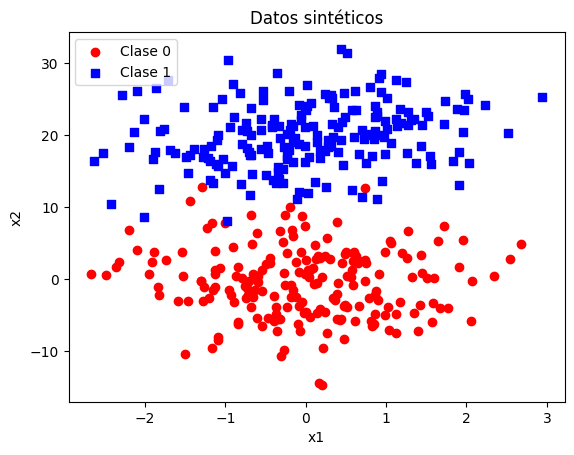

In [35]:
# Generar datos sintéticos
X, y = nf.datosSinteticos()

cmap = ListedColormap(colors[:len(np.unique(y))])

# Visualizar los datos
fig = plt.figure()
ax = fig.subplots()
ax.scatter(X.loc[y==0, 'x1'], X.loc[y==0, 'x2'], color='red', marker='o', label='Clase 0')
ax.scatter(X.loc[y==1, 'x1'], X.loc[y==1, 'x2'], color='blue', marker='s', label='Clase 1')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Datos sintéticos')
ax.legend(loc='upper left')
plt.show()

In [36]:
class Perceptron:
    def __init__(self, n_entradas, f_activacion):
        self.W = np.zeros((n_entradas,))
        self.b = 0.0
        self._f_activacion = f_activacion

    def inferencia(self, X):
        h = np.dot(X, self.W) + self.b
        return self._f_activacion(h)

def escalon(x):
    return np.where(x >= 0, 1, 0)

In [37]:
# Crear una instancia del perceptrón
clasificador = Perceptron(n_entradas=2, f_activacion=escalon)
print("Pesos iniciales:", clasificador.W)
print("Bias inicial:", clasificador.b)

Pesos iniciales: [0. 0.]
Bias inicial: 0.0


In [38]:
# Inicialización de parámetros (1 punto)
clasificador.W = np.random.normal(loc=0, scale=1, size=(2,))
clasificador.b = np.random.normal(loc=0, scale=1, size=(1,))
print("Pesos después de la inicialización:", clasificador.W)
print("Bias después de la inicialización:", clasificador.b)

Pesos después de la inicialización: [0.22006044 1.30046138]
Bias después de la inicialización: [-0.56630645]


In [39]:
# implementa la función de pérdida (1 punto)
def perdidaSAE(y_true, y_pred):
  suma = 0
  for y_t, y_p in zip(y_true,y_pred):
      suma += np.absolute(y_t - y_p)
  return suma

y_pred = clasificador.inferencia(X)
print("Pérdida inicial (SAE):", perdidaSAE(y, y_pred))

Pérdida inicial (SAE): 86


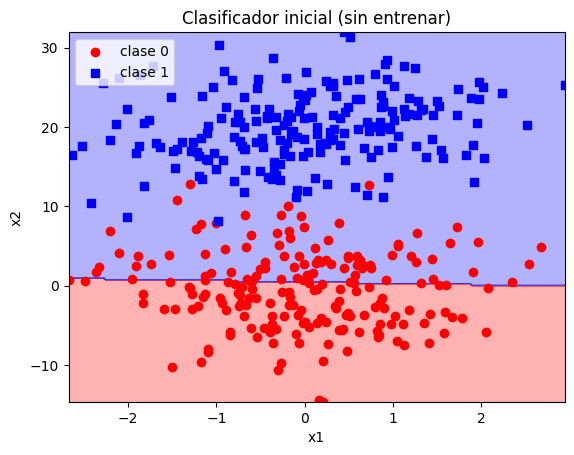

In [40]:
x1, x2 = np.meshgrid(
np.linspace(X.iloc[:,0].min(), X.iloc[:,0].max(), num=200),
    np.linspace(X.iloc[:,1].min(), X.iloc[:,1].max(), num=200)
)
grid = np.vstack([x1.ravel(), x2.ravel()]).T
y_pred = np.reshape(clasificador.inferencia(grid), x1.shape)

fig = plt.figure()
ax = fig.subplots()
display = DecisionBoundaryDisplay(xx0=x1, xx1=x2, response=y_pred)
display.plot(ax=ax, plot_method='contourf', cmap=cmap, alpha=0.3)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.scatter(X.loc[y==0, 'x1'], X.loc[y==0, 'x2'], color='red', marker='o', label='clase 0')
ax.scatter(X.loc[y==1, 'x1'], X.loc[y==1, 'x2'], color='blue', marker='s', label='clase 1')
ax.set_title('Clasificador inicial (sin entrenar)')
ax.legend(loc='upper left')
plt.show()

In [41]:
## Implementa la regla de aprendizaje (2 puntos)
class ReglaDeAprendizaje:
    def __init__(self, tasa_aprendizaje=0.1):
        self.tasa_aprendizaje = tasa_aprendizaje

    def actualizar(self, perceptron, X, y):
        for xi, target in zip(X.values, y.values):
            output = perceptron.inferencia(xi)
            error = target - output
            perceptron.W += self.tasa_aprendizaje*error*xi # Actualiza los pesos
            perceptron.b += self.tasa_aprendizaje*error # Actualiza el sesgo

In [53]:
# Configuración del entrenamiento
tasa_aprendizaje = 0.01
n_epocas = 5 #Configura el número de épocas

Época 1: Pérdida (SAE): 5
Época 2: Pérdida (SAE): 6
Época 3: Pérdida (SAE): 5
Época 4: Pérdida (SAE): 6
Época 5: Pérdida (SAE): 5


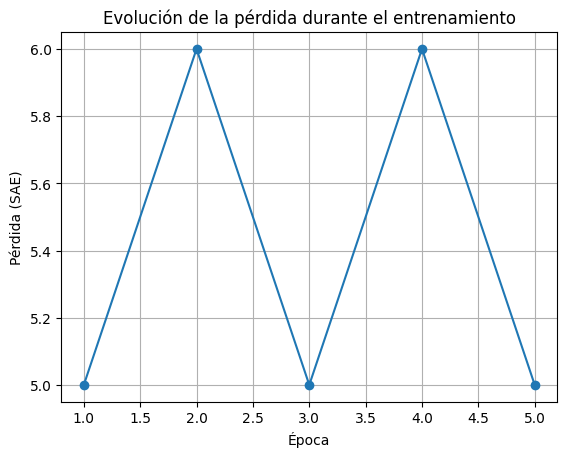

In [54]:
optimizador = ReglaDeAprendizaje(tasa_aprendizaje=tasa_aprendizaje)

historial_perdida = []

for epoca in range(n_epocas):
    y_pred = clasificador.inferencia(X)
    perdida = perdidaSAE(y, y_pred)
    print(f"Época {epoca+1}: Pérdida (SAE): {perdida}")
    historial_perdida.append(perdida)
    optimizador.actualizar(clasificador, X, y)

# Visualizar la pérdida a lo largo de las épocas
plt.plot(range(1, n_epocas + 1), historial_perdida, marker='o')
plt.xlabel('Época')
plt.ylabel('Pérdida (SAE)')
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.grid()
plt.show()

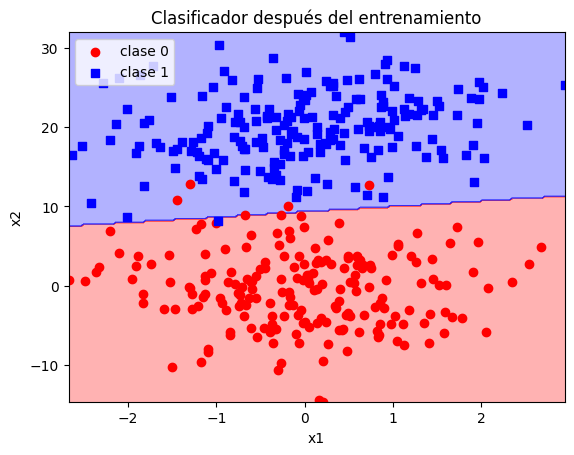

In [55]:
x1, x2 = np.meshgrid(
np.linspace(X.iloc[:,0].min(), X.iloc[:,0].max(), num=200),
    np.linspace(X.iloc[:,1].min(), X.iloc[:,1].max(), num=200)
)
grid = np.vstack([x1.ravel(), x2.ravel()]).T
y_pred = np.reshape(clasificador.inferencia(grid), x1.shape)

fig = plt.figure()
ax = fig.subplots()
display = DecisionBoundaryDisplay(xx0=x1, xx1=x2, response=y_pred)
display.plot(ax=ax, plot_method='contourf', cmap=cmap, alpha=0.3)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.scatter(X.loc[y==0, 'x1'], X.loc[y==0, 'x2'], color='red', marker='o', label='clase 0')
ax.scatter(X.loc[y==1, 'x1'], X.loc[y==1, 'x2'], color='blue', marker='s', label='clase 1')
ax.set_title('Clasificador después del entrenamiento')
ax.legend(loc='upper left')
plt.show()